In [647]:
import numpy as np 
import pandas as pd 
import os 
from tabulate import tabulate 
import matplotlib.pyplot as plt 
import seaborn as sns 


path = os.getcwd() 
filename = os.path.join(path, "dataSet")

## load data 
titanic = pd.read_csv(filename+"/titanic3.csv")
print titanic.info()
print titanic.isnull().sum() 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB
None
pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64


In [648]:
titanic=titanic.drop(['ticket','cabin', 'boat', 'body', 'home.dest','name'], axis=1)
titanic_s = titanic.dropna() 
print titanic_s.info()
print titanic_s.shape


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1308
Data columns (total 8 columns):
pclass      1043 non-null float64
survived    1043 non-null float64
sex         1043 non-null object
age         1043 non-null float64
sibsp       1043 non-null float64
parch       1043 non-null float64
fare        1043 non-null float64
embarked    1043 non-null object
dtypes: float64(6), object(2)
memory usage: 73.3+ KB
None
(1043, 8)


In [175]:
fig = plt.figure(figsize=(24,10), dpi=2400) 

ax1 = plt.subplot2grid((3,3), (0,0))
titanic_s.survived.value_counts().plot(kind='bar')
ax1.set_xlim(-1,2)
plt.title("distribution of survival, 1=survived")

plt.subplot2grid((3,3), (0,1))
titanic_s.age.hist(bins=10, grid=True) 
plt.title('distribution of ages')

ax3 = plt.subplot2grid((3,3),(0,2))
titanic_s.pclass.value_counts().plot(kind='bar')
plt.title("class distribution")

plt.subplot2grid((3,3), (2,1), colspan=2)
titanic_s.age[titanic_s.pclass==1].plot(kind='kde')
titanic_s.age[titanic_s.pclass==2].plot(kind='kde')
titanic_s.age[titanic_s.pclass==3].plot(kind='kde')
plt.xlabel("Age")
plt.title("age distribtuion with classes")
plt.legend(('1st class', '2nd class', '3rd class'), loc='best')

ax5=plt.subplot2grid((3,3), (2,0))
titanic_s.embarked.value_counts().plot(kind='bar')
ax5.set_xlim(-1, len(titanic.embarked.value_counts()))
plt.title("passengers per boarding location")

plt.subplot2grid((3,3), (1,0))
titanic_s.sex.value_counts().plot(kind='bar') 
plt.title('distribution of genders')

plt.subplot2grid((3,3), (1,1))
titanic_s.parch.hist(bins=10, grid=True) 
plt.title('distribution of parents on board')

plt.subplot2grid((3,3), (1,2))
titanic_s.sibsp.hist(bins=10, grid=True) 
plt.title('distribution of siblings on board')


In [176]:
## correlation table 
corr = titanic_s.corr()
print corr

            pclass  survived       age     sibsp     parch      fare
pclass    1.000000 -0.317737 -0.409082  0.046333  0.016342 -0.564558
survived -0.317737  1.000000 -0.057416 -0.011403  0.115436  0.247858
age      -0.409082 -0.057416  1.000000 -0.242345 -0.149311  0.177205
sibsp     0.046333 -0.011403 -0.242345  1.000000  0.373960  0.142131
parch     0.016342  0.115436 -0.149311  0.373960  1.000000  0.217650
fare     -0.564558  0.247858  0.177205  0.142131  0.217650  1.000000


In [177]:
### study age by groups 
ds_age = titanic_s.age.hist(bins=40, color = 'b')
ds_age.set_title("distribution of age")
ds_age.set_xlabel('Ages')
ds_age.set_ylabel('passengers')

def age_groups(low_bound, upper_bound, df):
    mask = (df.age < upper_bound) & (df.age>=low_bound)
    group = df.loc[mask]
    survival_rate = group[group.survived == 1].size/group.size.astype(np.float)
    print survival_rate 
sur_0 = age_groups(0,5, titanic_s)
sur_5=age_groups(5,10, titanic_s)
sur_10=age_groups(10,20,titanic_s)
sur_20=age_groups(20,30,titanic_s)
sur_30=age_groups(30,40, titanic_s)
sur_40=age_groups(40,50,titanic_s)
sur_50=age_groups(50,60,titanic_s)
sur_60=age_groups(60,100,titanic_s)
avg = age_groups(0,100,titanic_s)


    

0.647058823529
0.548387096774
0.391608391608
0.369186046512
0.419913419913
0.385185185185
0.457142857143
0.289473684211
0.407478427613


In [178]:
g = sns.FacetGrid(titanic_s, hue='survived', col='sex', margin_titles=True, palette="Set1", hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "fare", "age", edgecolor='w').add_legend()
plt.subplots_adjust(top=0.4) 

g = sns.FacetGrid(titanic_s, hue='survived', col='embarked', margin_titles=True, palette="Set1", hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "fare", "age", edgecolor='w').add_legend()
plt.subplots_adjust(top=0.6)


In [179]:
sns.factorplot(x='embarked', y='survived', data=titanic_s, color='b')
plt.title('survived fraction by embarked port ')

In [180]:
sns.set(font_scale=1)
g = sns.factorplot(x="sex", y="survived", col="embarked",
                    data=titanic_s, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(  g.set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class')

In [181]:
sns.set(font_scale=1)
g = sns.factorplot(x="pclass", y="survived", col="embarked",
                    data=titanic_s, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(g.set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)

In [208]:
#########################################
## supervised machine learning
y = titanic_s.survived.values 
x = titanic_s[["pclass","age","fare", "sex", "embarked"]].values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
labelencoder_X = LabelEncoder() 
x[:,3] = labelencoder_X.fit_transform(x[:,3])
x[:,4] = labelencoder_X.fit_transform(x[:,4])
print x[0,:]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

[1.0 29.0 211.3375 0L 2L]


In [649]:
### decision tree algorithms 
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score 
def plot_learning_curve(estimator, title, X, y, cv=None,
                        train_sizes=np.linspace(0.1,
                        1.0,5 )):
    plt.figure() 
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, 
                                                           y, cv=cv, n_jobs=1,
                                                           train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std= np.std(train_scores, axis=1)
    test_scores_mean=np.mean(test_scores, axis=1)
    test_scores_std=np.std(test_scores, axis=1)
    plt.grid() 
    
    plt.fill_between(train_sizes, train_scores_mean-train_scores_std, 
                    train_scores_mean+train_scores_std, alpha=0.1, 
                     color='r')
    plt.fill_between(train_sizes, test_scores_mean-test_scores_std, 
                    test_scores_mean+test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', 
            label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
            label="cross-validation score")
    plt.legend(loc="best")
    return plt 

def plot_validation_curve(estimator, title, X, y, cv=None,
                          name="gamma",param_range=np.logspace(-6,3,9),
                          scoring="accuracy", n_jobs=1):
    plt.figure() 
    plt.title(title)
    plt.xlabel("$\gamma$") 
    plt.ylabel("score")
    plt.ylim(0.0, 1.1) 
    lw = 2
    train_scores, test_scores=validation_curve(estimator, X,y,param_name=name, 
                                               param_range=param_range, cv=cv, 
                                               scoring=scoring, n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
    plt.legend(loc="best")
    return plt 
    




In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=10, max_depth=4)
k = 5 
cms = [] 
scores = [] 
nodes = [] 
train_scores = [] 
for i in range(k): 
    x_tr, x_cv, y_tr, y_cv = train_test_split(X_train, y_train,test_size=0.2 )
    clf = clf.fit(x_tr, y_tr)
    y_cv_p = clf.predict(x_cv)
    y_tr_p = clf.predict(x_tr)
    cm = confusion_matrix(y_cv, y_cv_p)
    score = accuracy_score(y_cv, y_cv_p)
    train_score = accuracy_score(y_tr, y_tr_p)
    node = clf.tree_.node_count 
    nodes.append(node)
    scores.append(score)
    train_scores.append(train_score)
    cms.append(cm)
print cms 
print scores 
print nodes 
print train_scores

In [657]:
clf = DecisionTreeClassifier(criterion="entropy",min_samples_leaf=10, max_depth=4)
clf2 = DecisionTreeClassifier(criterion="entropy")

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title = 'decison tree'
plot_learning_curve(clf2, title, X_train, y_train, cv=cv,
                        train_sizes=np.linspace(0.1,
                        1.0,5 ))

plot_learning_curve(clf, title, X_train, y_train, cv=cv,
                        train_sizes=np.linspace(0.1,
                        1.0,5 ))

plt.show()

<module 'matplotlib.pyplot' from 'C:\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

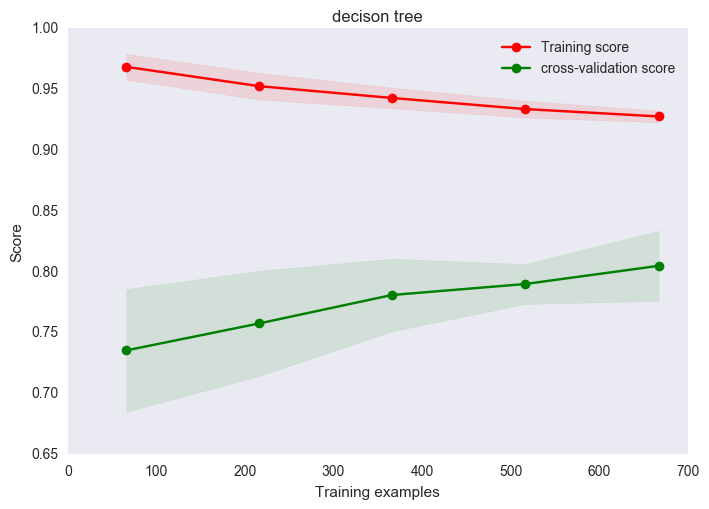

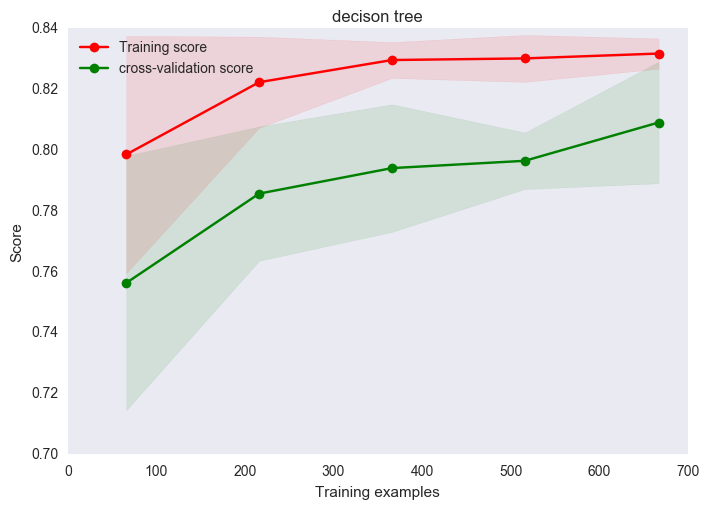

In [660]:
from sklearn.metrics import classification_report 
X_tr, X_cv, y_tr, y_cv = train_test_split(X_train,y_train,test_size=0.2,random_state=42)
clf = clf.fit(X_tr, y_tr)
y_pcv = clf.predict(X_cv)
y_pred = clf.predict(X_test)
print classification_report(y_test, y_pred), classification_report(y_cv, y_pcv)


             precision    recall  f1-score   support

        0.0       0.77      0.92      0.84       125
        1.0       0.83      0.60      0.69        84

avg / total       0.80      0.79      0.78       209
             precision    recall  f1-score   support

        0.0       0.82      0.92      0.87        98
        1.0       0.86      0.71      0.78        69

avg / total       0.84      0.83      0.83       167



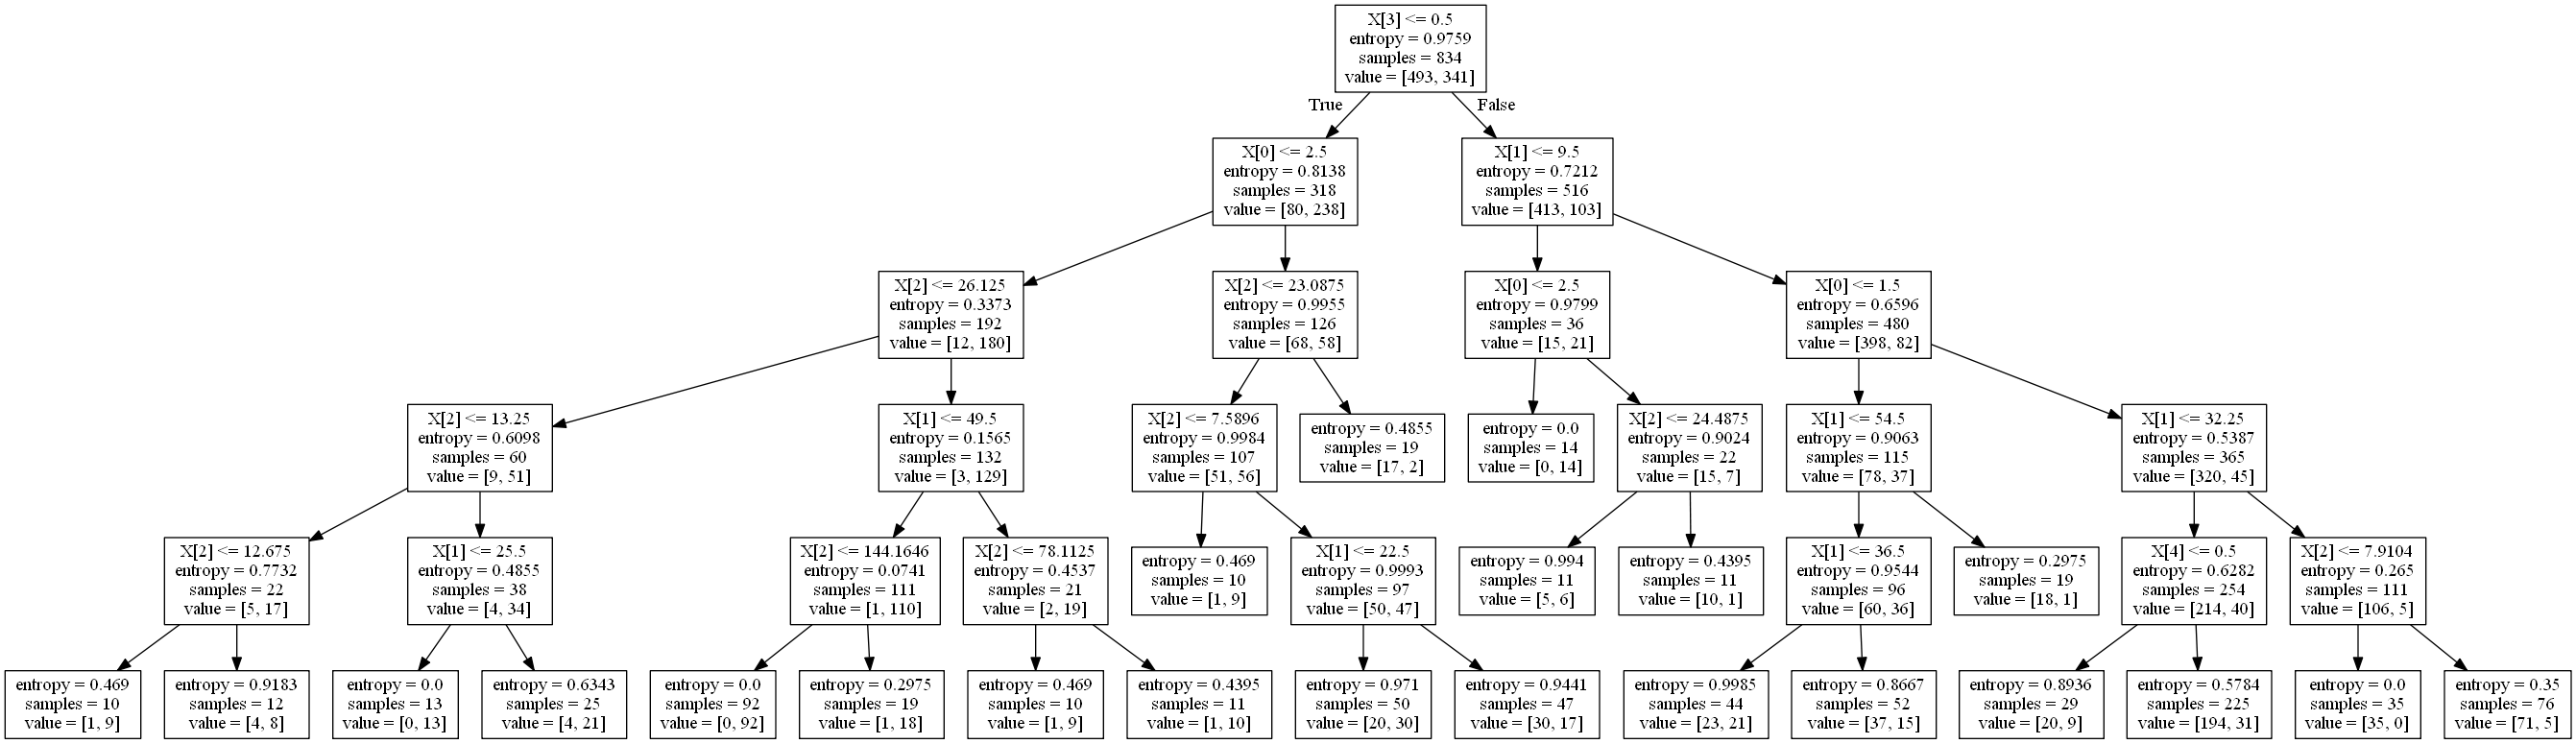

In [212]:
import pydotplus 
from IPython.display import Image 

dot_data = tree.export_graphviz(clf, out_file=None)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [213]:
#### nerual newtworks 
## further deal with the categorical data 
print x[1,:]
onehotencoder = OneHotEncoder(categorical_features=[3,4])
x = onehotencoder.fit_transform(x).toarray()
print x.shape 
print x[1,:]

[1.0 0.9167 151.55 1L 2L]
(1043L, 8L)
[   0.        1.        0.        0.        1.        1.        0.9167
  151.55  ]


In [214]:
## group the age data 

for i in range(len(x[:,6])):
    if x[i,6] <= 10:
        x[i,6] = 1.
    elif x[i,6] <= 20:
        x[i,6] = 2.
    elif x[i,6] <= 60:
        x[i,6] = 3. 
    elif x[i,6] < 100:
        x[i,6] = 4.

In [220]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
## development the neural networks 
# scale in train data, apply the paramters in test data 
low_limit = X_train[:,7].min() 
high_limit = X_train[:,7].max() 
X_train[:,7] = (X_train[:,7] - low_limit)/(high_limit - low_limit)
X_test[:,7] = (X_test[:,7] - low_limit)/(high_limit - low_limit)


In [368]:
from sklearn.neural_network import MLPClassifier 
K = 5 
hidden_neurons = 100
iter_rates = np.arange(1,500,10)
def cv_train_errors_iteration(X_train, y_train): 
    tr_scores =[]
    tr_losses = []
    cv_scores = []
    for i in range(K): 
        x_tr, x_cv, y_tr, y_cv = train_test_split(X_train, y_train,test_size=0.2)
        mlps=[]
        tr_loss =[]
        cv_score = []
        tr_score = []
        for iteration in iter_rates:
            mlp=MLPClassifier(hidden_layer_sizes=(hidden_neurons,),activation=('logistic'), max_iter=iteration,
                             alpha=0.0001, solver='lbfgs', verbose=0,tol=0.000000001, momentum=0.1, 
                              learning_rate_init=0.03)
            mlp.fit(x_tr,y_tr)
            mlps.append(mlp)
            tr_score.append(mlp.score(x_tr,y_tr))
            cv_score.append(mlp.score(x_cv, y_cv))
            tr_loss.append(mlp.loss_)
        tr_scores.append(tr_score)
        cv_scores.append(cv_score)
        tr_losses.append(tr_loss)
    return mlps, tr_scores, tr_losses, cv_scores

mlps, tr_scores, tr_losses, cv_scores=cv_train_errors_iteration(X_train, y_train)


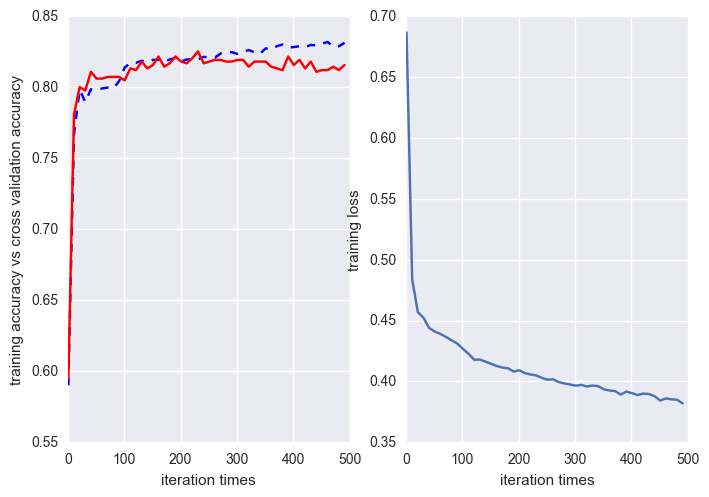

In [373]:
tr_scores = np.array(tr_scores)
tr_losses = np.array(tr_losses)
cv_scores = np.array(cv_scores)
ave_tr_s = tr_scores.mean(axis=0)
ave_cv_s = cv_scores.mean(axis=0)
ave_tr_l = tr_losses.mean(axis=0)
plt.subplot2grid((1,2),(0,0))
plt.plot(iter_rates, ave_tr_s, 'b--', iter_rates, ave_cv_s, 'r')
plt.legend(loc="best")
plt.xlabel('iteration times')
plt.ylabel('training accuracy vs cross validation accuracy')


plt.subplot2grid((1,2),(0,1))
plt.plot(iter_rates, ave_tr_l)
plt.xlabel('iteration times')
plt.ylabel('training loss')
plt.show()

In [374]:
mlp = mlps[-1]
print mlp.score(X_test, y_test)
y_pred = mlp.predict(X_test)
pred_score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print cm

0.77990430622
[[117   8]
 [ 38  46]]


In [ ]:
## ada boosting 


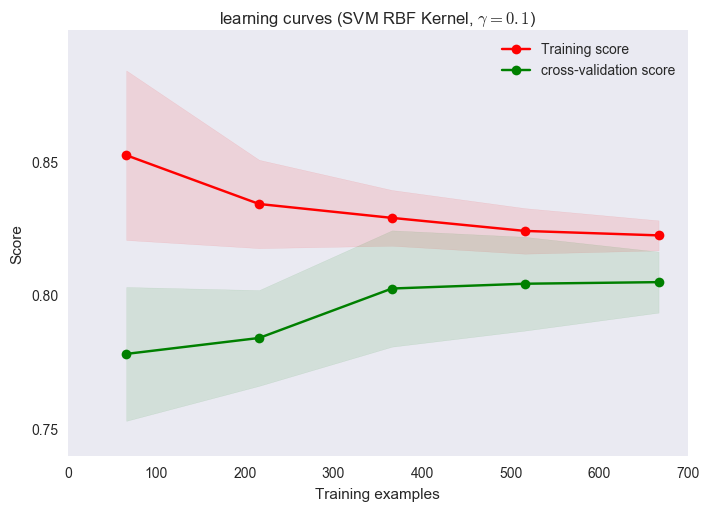

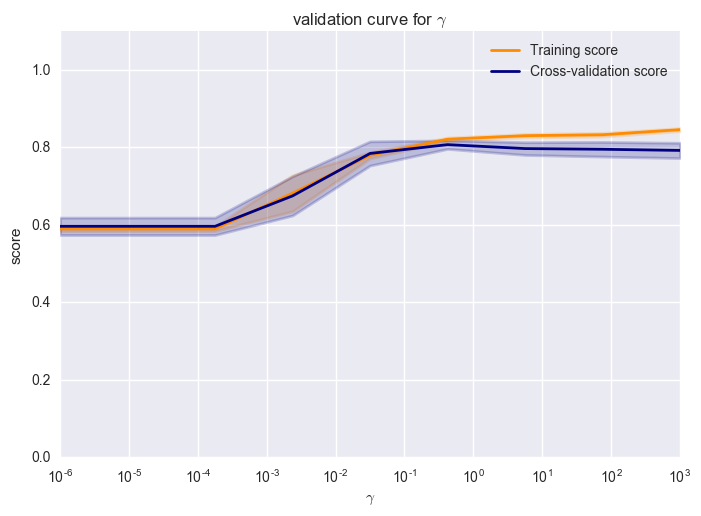

In [644]:
#### SVM, libsvm 
from sklearn import svm 
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import validation_curve


title = "learning curves (SVM RBF Kernel, $\gamma=0.1$)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator=svm.SVC(C=.5,gamma=0.6)
plot_learning_curve(estimator, title, X_train, y_train, cv=cv)


tit2 ="validation curve for $\gamma$" 
estimator=svm.SVC(C=.5)
plot_validation_curve(estimator, tit2, X_train, y_train, cv=cv)
plt.show()


In [645]:
## evaluation parameter C 
from sklearn.model_selection import GridSearchCV
cs = np.logspace(-3,3,20)
param_grid = dict(C=cs)
estimator_sets = [svm.SVC(gamma=0.05), svm.SVC(gamma=0.5), svm.SVC(gamma=0.8)]
cv = ShuffleSplit( train_size=0.8,n_splits=200, random_state=1)
grids = []
for estimator in estimator_sets: 
    grid=GridSearchCV(estimator, refit=False, param_grid=param_grid, cv=cv)
    grid.fit(X_train, y_train)
    grids.append(grid)
    
score1 = grids[0].cv_results_['mean_test_score']
score2 = grids[1].cv_results_['mean_test_score']
score3 = grids[2].cv_results_['mean_test_score']
plt.subplot2grid((3,1),(0,0))
plt.semilogx(cs, score1, label='C', lw=2)
plt.xlabel('C')
plt.ylabel('score, gamma = 0.05')

plt.subplot2grid((3,1),(1,0))
plt.semilogx(cs, score2, label='C', lw=2)
plt.xlabel('C')
plt.ylabel('score,, gamma = 0.5')

plt.subplot2grid((3,1),(2,0))
plt.semilogx(cs, score2, label='C', lw=2)
plt.xlabel('C')
plt.ylabel('score,, gamma = 0.8')

plt.show()


KeyboardInterrupt: 

In [526]:
svmclassifier = svm.SVC(C=0.5, gamma =0.5)

svmclassifier.fit(X_train, y_train)
y_pred = svmclassifier.predict(X_test)

pred_score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print pred_score, cm




0.77990430622 [[121   4]
 [ 42  42]]


In [664]:
svmlinear=svm.SVC(kernel='linear', C=0.5)

svmlinear.fit(X_train, y_train)
y_pred = svmlinear.predict(X_test)

pred_score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print pred_score, cm

0.77033492823 [[109  16]
 [ 32  52]]


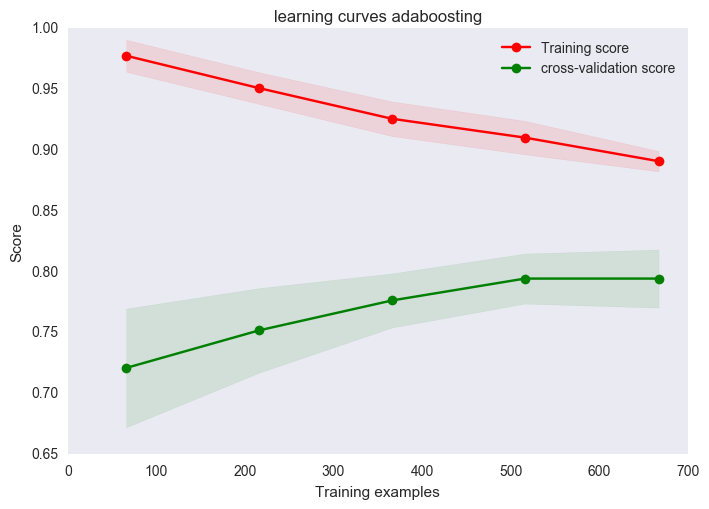

In [543]:
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier 
#bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), algorithm="SAMME",
#                        n_estimators=200)
title = "learning curves adaboosting"
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
estimator= AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), 
                                algorithm="SAMME", n_estimators=200)
plot_learning_curve(estimator, title, X_train, y_train, cv=cv)
plt.show()


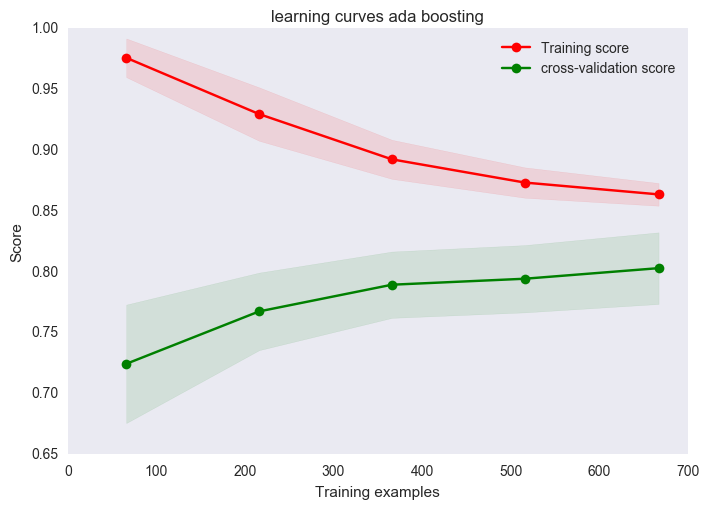

In [560]:
### adaboosting 
from sklearn.ensemble import AdaBoostClassifier 
#bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), algorithm="SAMME",
#                        n_estimators=200)
title = "learning curves ada boosting"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator= AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), 
                                algorithm="SAMME", n_estimators=400)
plot_learning_curve(estimator, title, X_train, y_train, cv=cv)
plt.show()

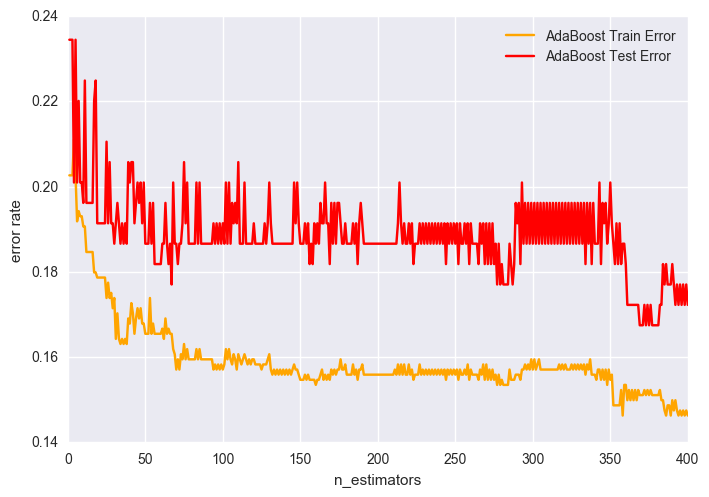

In [562]:
### for training and testing 
from sklearn.metrics import zero_one_loss
estimator= AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), 
                                algorithm="SAMME", n_estimators=400)
estimator.fit(X_train, y_train)
y_pred= estimator.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print pred_score, cm 
ada_train_err =  np.zeros((400,))
for i, y_p_train in enumerate(estimator.staged_predict(X_train)):
    ada_train_err[i] = zero_one_loss(y_p_train, y_train)
ada_test_err = np.zeros((400,))
for i, y_pred in enumerate(estimator.staged_predict(X_test)):
    ada_test_err[i] = zero_one_loss(y_pred, y_test)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(400) + 1, ada_train_err,label='AdaBoost Train Error',color='orange')
ax.plot(np.arange(400) + 1, ada_test_err,label='AdaBoost Test Error',color='red')
leg=ax.legend(loc='upper right')
leg.get_frame().set_alpha(0.7)
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')

plt.show()


In [580]:
# KNN algorithm 
corr = [] 
for i in range(X_train.shape[1]):
    corr.append(np.corrcoef(X_train[:,i], y_train))
print corr

[array([[ 1.        ,  0.54220554],
       [ 0.54220554,  1.        ]]), array([[ 1.        , -0.54220554],
       [-0.54220554,  1.        ]]), array([[ 1.        ,  0.21231766],
       [ 0.21231766,  1.        ]]), array([[ 1.        , -0.06907992],
       [-0.06907992,  1.        ]]), array([[ 1.        , -0.16076279],
       [-0.16076279,  1.        ]]), array([[ 1.        , -0.33512754],
       [-0.33512754,  1.        ]]), array([[ 1.        , -0.11454596],
       [-0.11454596,  1.        ]]), array([[ 1.        ,  0.24722694],
       [ 0.24722694,  1.        ]])]
(834L, 5L)


In [641]:
X_trknn = np.delete(X_train, [4,6], 1)
X_testknn = np.delete(X_test, [4,6], 1)


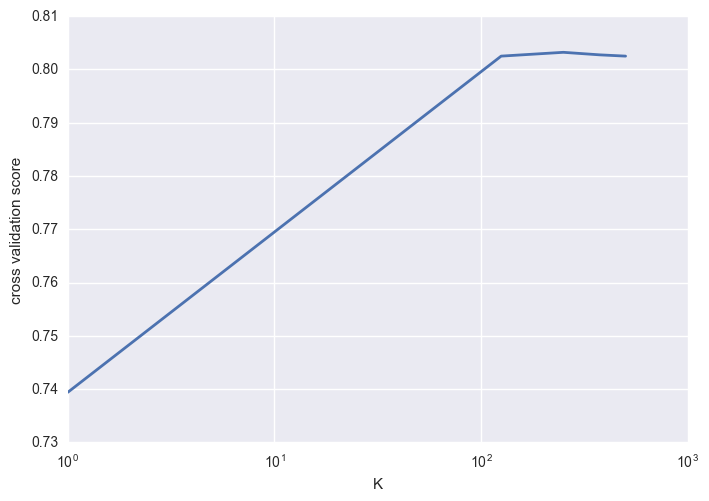

In [642]:
## validate the k parameters 
from sklearn.neighbors import KNeighborsClassifier
ks = np.linspace(1, 500,5).astype(int)
errors = [] 
param_grid=dict(n_neighbors=ks)
cv = ShuffleSplit( train_size=0.8, n_splits=100, random_state=1)
knnclf = KNeighborsClassifier(weights='distance', algorithm='brute', 
                              metric='minkowski', p=2)
grid=GridSearchCV(knnclf, refit=False, param_grid=param_grid, cv=cv)
grid.fit(X_trknn, y_train)
score = grid.cv_results_['mean_test_score']

plt.semilogx(ks, score, label='K', lw=2)
plt.xlabel('K')
plt.ylabel('cross validation score')
plt.show()



In [643]:
knnclf = KNeighborsClassifier(n_neighbors=180, weights='distance', algorithm='brute', 
                              metric='minkowski', p=2)
knnclf.fit(X_trknn, y_train)
y_pred=knnclf.predict(X_testknn)
score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print pred_score, cm 


0.77990430622 [[117   8]
 [ 35  49]]
